# Lab II - Clustering - Machine Learning II

Estudiante: Mafredy Acevedo

In [11]:
#Importing needed libraries

#Data structures:
import numpy as np
import pandas as pd

#Data Visualization:
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets:
from sklearn.datasets import make_blobs

#Metrics:
from sklearn.metrics import silhouette_score

#Various scikit-learn utilities for 6th point
from sklearn import cluster, datasets, mixture
from sklearn_extra.cluster import KMedoids


## Punto 1

Research about the Spectral Clustering method, and answer the following questions:

### a)

    In which cases might it be more useful to apply?

    When dealing with datasets where clusters have complex non-convex shapes, spectral clustering can be more effective than traditional methods like K-Means, which assume convex clusters.

### b)

    What are the mathematical fundamentals of it?

    *Graph Laplacian*: Spectral clustering involves constructing a graph Laplacian matrix from the data or affinity matrix. The Laplacian matrix encodes the relationships between data points in the graph.

    *Eigenvalues and Eigenvectors*: The Laplacian matrix is decomposed into its eigenvalues and eigenvectors. The eigenvalues and corresponding eigenvectors contain information about the cluster structure of the data.

    *Spectral Embedding*: By selecting the top eigenvectors associated with the smallest eigenvalues, you can create a lower-dimensional representation of the data, which often reveals the underlying cluster structure.

### c)

    What is the algorithm to compute it?

    1. Form a distance matrix
    2. Transform the distance matrix into an affinity matrix A
    3. Compute the degree matrix D and the Laplacian matrix L = D – A.
    4. Find the eigenvalues and eigenvectors of L.
    5. With the eigenvectors of k largest eigenvalues computed from the previous step form a matrix.
    6. Normalize the vectors.
    7. Cluster the data points in k-dimensional space.

### d)

    Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

    Yes, it is related to the mathematical fundamentals of some dimentional reduction algorithms such as PCA and SVD. All of these methods rely on linear algebra concepts to find the eigenvalues and eigenvectors of a Matrix (Laplacian matrix in the case of Spectral Clustering), with the objetive of finding a low-dimensional matrix that helps to find solutions.





## Punto 2

Research about the DBSCAN method, and answer the following questions:

### a)

    In which cases might it be more useful to apply?

    DBSCAN: Density-Based Spatial Clustering of Applications with Noise

    When dealing with datasets that have arbitrary shapes (Non-linear i.e.) or the clusters inside have different densities, wich means different groups or clusters of data points within the dataset have varying levels of data points per unit of space. In other words, some clusters might be more densely packed with data points, while others might be sparser.

    It is important to notice that it is not sensitive to outliers and can handle them pretty well.

### b)

    What are the mathematical fundamentals of it?

    *Density Reachability*

    A point “p” is said to be density reachable from a point “q” if point “p” is within ε distance from point “q” and “q” has a sufficient number of points in its neighbors which are within distance ε.

    *Density Connectivity*

    A point “p” and “q” are said to be density connected if there exists a point “r” which has a sufficient number of points in its neighbors and both the points “p” and “q” is within the ε distance. This is a chaining process. So, if “q” is neighbor of “r”, “r” is neighbor of “s”, “s” is neighbor of “t” which in turn is neighbor of “p” implies that “q” is neighbor of “p”.

### c)

    Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

    DBSCAN and Spectral Clustering have different underlying principles and are applied in distinct ways. They can complement each other in a clustering pipeline when the data's characteristics and the specific clustering goals require a combination of techniques to achieve meaningful results.








## Punto 3

What is the elbow method in clustering? 

The elbow method is a popular heuristic technique used to determine the optimal number of clusters for a clustering algorithm, such as K-means. It involves plotting the variance (or a similar measure of within-cluster dispersion) as a function of the number of clusters and looking for a point in the plot where the rate of decrease in variance slows down, forming an "elbow." The number of clusters corresponding to this "elbow" point is often considered the optimal choice.

And which flaws does it pose to assess quality?

- Inadequate for All Datasets: 

    The elbow method assumes that the data has well-separated and spherical clusters. In cases where the clusters have complex shapes or varying densities, the method may not work well.

- Dependence on Initialization:

    The outcome of the elbow method can be influenced by the initial configuration of the clustering algorithm. Running K-means with different initializations can lead to different results, potentially leading to different "elbow" points.

- Noisy Data: 
    
    For datasets with significant noise or outliers, the elbow method may suggest suboptimal cluster numbers. Outliers can skew the variance values, affecting the appearance of the "elbow" in the plot.

## Punto 4

In [7]:
#Importing needed modules from unsupervised package:

from unsupervised import KMeans,KMedoids

## Punto 5

### a)
Use the following code snippet to create scattered data X

In [27]:
#Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
)

### b)
Plot the resulting dataset. How many clusters are there? How far are they from one another?

In [28]:
#Storing the data in a dataframe
X_df = pd.DataFrame(X)
X_df.columns=['x','y']
Clusters=pd.DataFrame(y)
Clusters.columns=['Cluster']
X_Clusters=pd.concat([X_df,Clusters],axis=1)

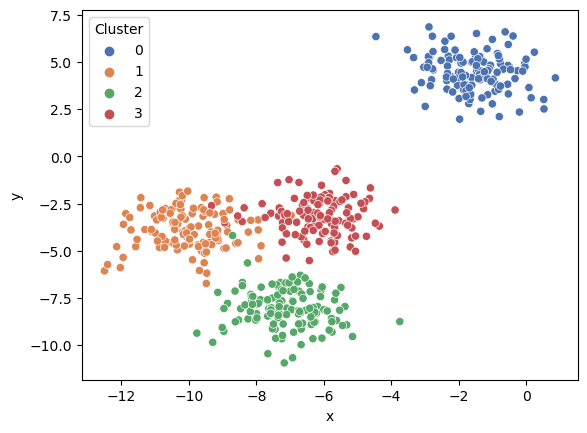

In [29]:
# Creating scatter plot using
sns.scatterplot(data=X_Clusters, x='x', y='y', hue='Cluster',palette='deep')

# Mostrar el gráfico
plt.show()

The data labeled as Cluster0 is notably distant from the rest of the dataset, making it evident that this cluster of points belongs to a distinct category. However, this situation is not easily extrapolatable to the other clusters. This is mainly because of the lack of information regarding the units and the meaning of the 'x' and 'y' data, and moreover, all three clusters show a close proximity to one another.

### c)
For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters

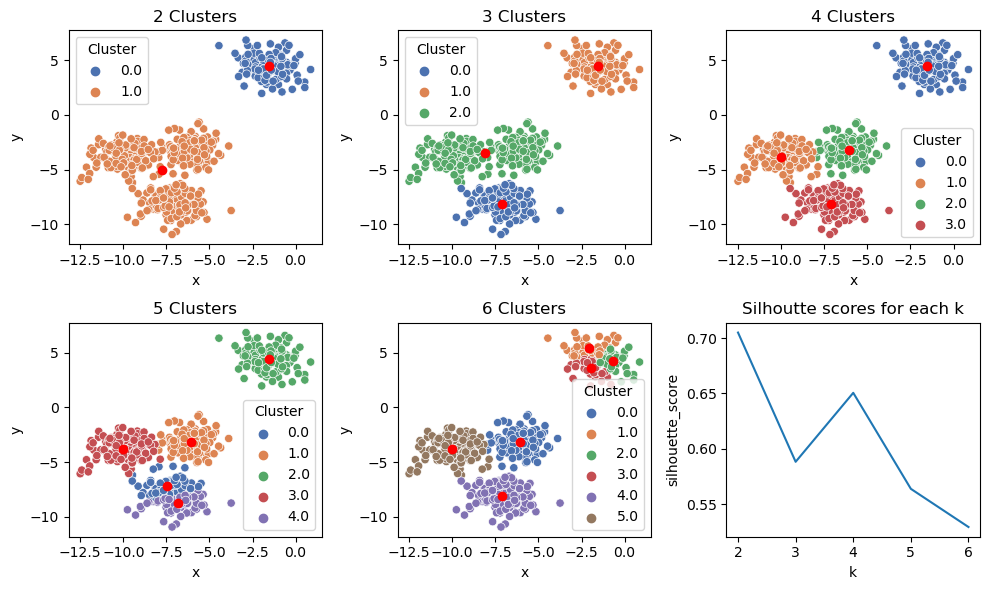

In [10]:
#Using my KMeans
silhouette_scores=np.zeros(5)
plt.figure(figsize=(10, 6))
for i in list(range(2,7)):
    newKMeans=KMeans.my_KMeans(k=i,n=100)
    labels=newKMeans.fit_transform(X)
    labels_df=pd.DataFrame(labels)
    labels_df.columns=['Cluster']
    X_labels=pd.concat([X_df,labels_df],axis=1)
    Centroides=newKMeans.centroides
    plt.subplot(2, 3, i-1)
    sns.scatterplot(data=X_labels, x='x', y='y', hue='Cluster',palette='deep')
    plt.scatter(x=Centroides[:,0],y=Centroides[:,1],color='red')
    plt.title(f'{i} Clusters')
    

    silhouette_scores[i-2]=silhouette_score(X,labels)

plt.subplot(2, 3, 6)
plt.plot(range(2,7),silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title(f'Silhoutte scores for each k')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

### d)
What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

The results indicate that the optimal number of clusters is k=2, which is quite intuitive given that the graphical representation clearly shows two distinct groups of data: one positioned in the upper right and the other in the lower left. Nevertheless, if we have prior knowledge about the nature of the data, maybe it could make us cut the bigger cluster in N clusters, such as it was do it in examples of k>2, or even make us cut the upper right group of data in more clusters, like the k=6 example. At the end, while the silhouette score serves as a valuable guide when exploring unfamiliar datasets, in certain cases, the specific requirements of our modeling task may necessitate deviating from optimal metrics and selecting a cluster count that aligns better with our objectives.

In adition, it is important to say that the kmeans algorithm created from scratch is far away from being optimal. Different executions of the "fit_transform" method will change the results, specially with a bigger k. First analysis of it shows that it can be related with the way of positioning the seeds of the representative vectors to create the clusters of the first iteration.

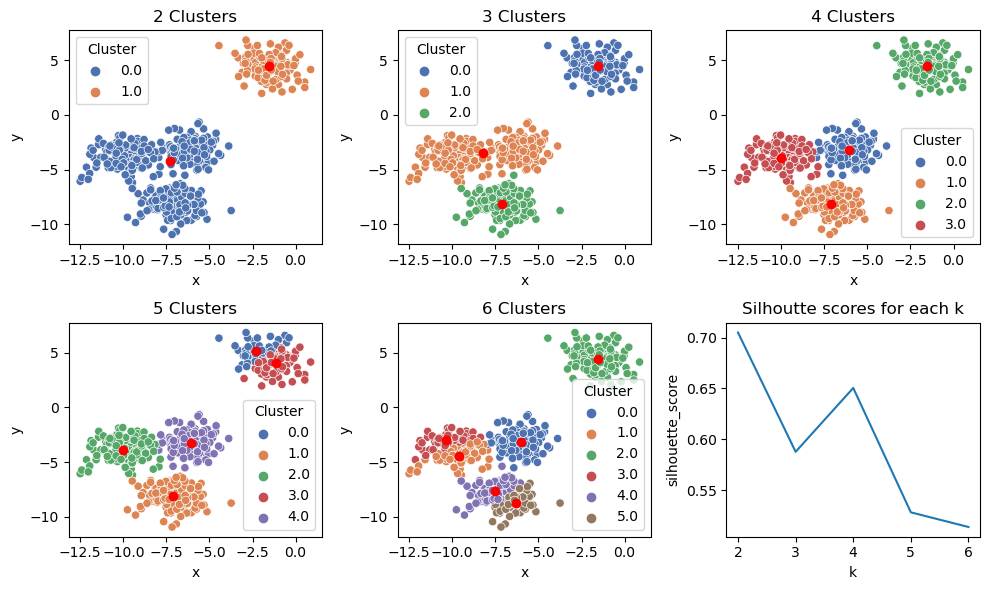

In [6]:
#Using my KMedoids
silhouette_scores=np.zeros(5)
plt.figure(figsize=(10, 6))
for i in list(range(2,7)):
    newKMedoids=KMedoids.my_KMedoids(k=i,n=100)
    labels=newKMedoids.fit_transform(X)
    labels_df=pd.DataFrame(labels)
    labels_df.columns=['Cluster']
    X_labels=pd.concat([X_df,labels_df],axis=1)
    Centroides=newKMedoids.centroides
    plt.subplot(2, 3, i-1)
    sns.scatterplot(data=X_labels, x='x', y='y', hue='Cluster',palette='deep')
    plt.scatter(x=Centroides[:,0],y=Centroides[:,1],color='red')
    plt.title(f'{i} Clusters')
    

    silhouette_scores[i-2]=silhouette_score(X,labels)

plt.subplot(2, 3, 6)
plt.plot(range(2,7),silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title(f'Silhoutte scores for each k')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

The KMedoids method, at least for the this dataset, presents a similar behaviour with the KMeans method, making the previous conclusions scalable. Since there is no atypical data, there is no way to apreciate the benefits of using KMedoids instead of KMeans.

## Punto 6

Use the following code snippet to create different types of scattered data:

In [3]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

### a) 
Plot the different datasets in separate figures. What can you say about them?

In [4]:
super_dataset=[['noisy_circles',noisy_circles[0][:,0],noisy_circles[0][:,1],noisy_circles[1]],
             ['noisy_moons',noisy_moons[0][:,0],noisy_moons[0][:,1],noisy_moons[1]],
             ['blobs',blobs[0][:,0],blobs[0][:,1],blobs[1]],
             ['no_structure',no_structure[0][:,0],no_structure[0][:,1],no_structure[1]],
             ['aniso',aniso[0][:,0],aniso[0][:,1],aniso[1]],
             ['varied',varied[0][:,0],varied[0][:,1],varied[1]]]
             

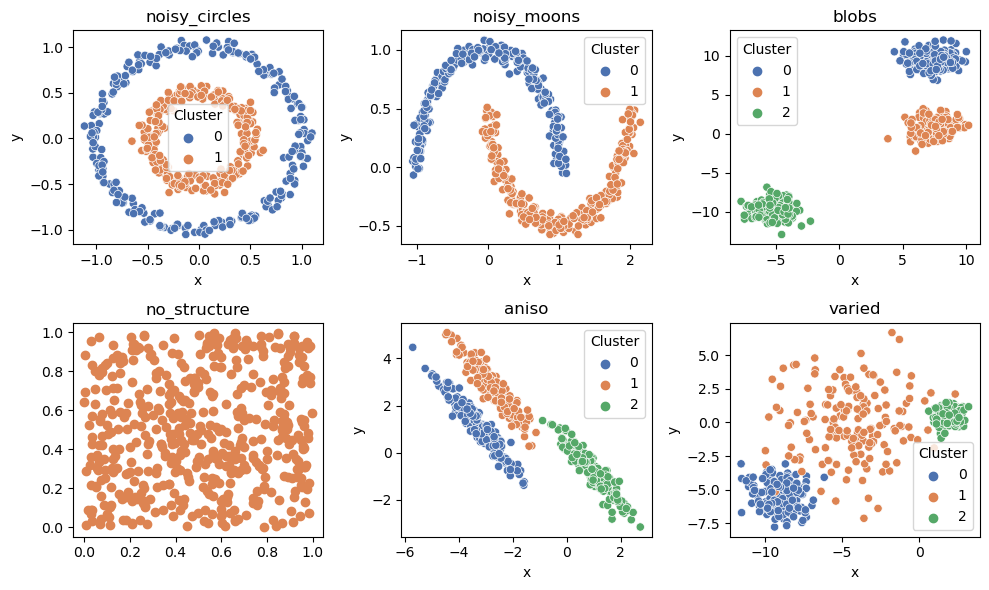

In [6]:
plt.figure(figsize=(10, 6))
for i,dataset in enumerate(super_dataset):
    plt.subplot(2, 3, i+1)
    if dataset[3] is not None:
        x=pd.DataFrame(dataset[1])
        y=pd.DataFrame(dataset[2])
        clusters=pd.DataFrame(dataset[3])
        temp_df=pd.concat([x,y,clusters],axis=1)
        temp_df.columns=['x','y','Cluster']
        sns.scatterplot(data=temp_df, x='x', y='y', hue='Cluster',palette='deep')
    else:
        plt.scatter(x=dataset[1],y=dataset[2],color=sns.color_palette("deep")[1])
    plt.title(f'{dataset[0]}')
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Some of this datasets, like makeblobs with low random_state, noisy_circles, noisy_moons and anisotropically distributed data can be easily separed into different clusters, considering the distributions of its data. On the other hand, the other datasets present a distribution of their points that is not that easy to compact and separete, specially the dataset made from random data.

### b)
Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

In [43]:
sklKMeans=cluster.KMeans(n_clusters=2)
sklKMdoids=KMedoids(n_clusters=2)
sklDBSCAN=cluster.DBSCAN()
sklSpectralClustering=cluster.SpectralClustering(n_clusters=2)

clusterers={'KMeans':sklKMeans,'KMedoids':sklKMdoids,'DBSCAN':sklDBSCAN,'Spectral Clustering':sklSpectralClustering}

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


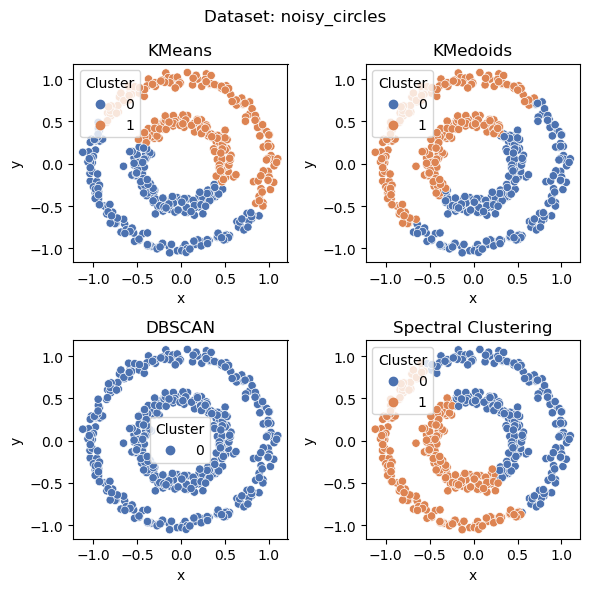

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


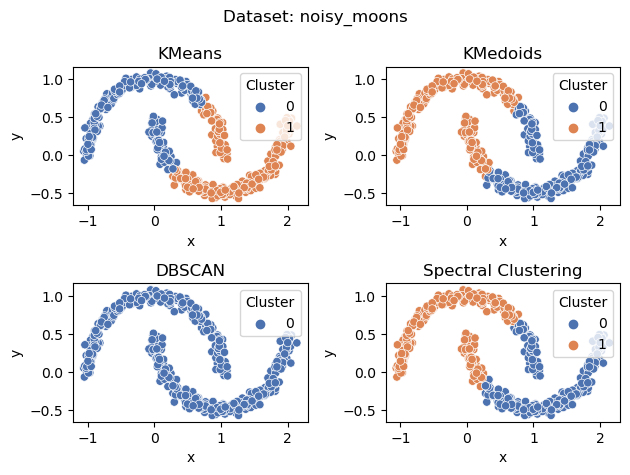

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


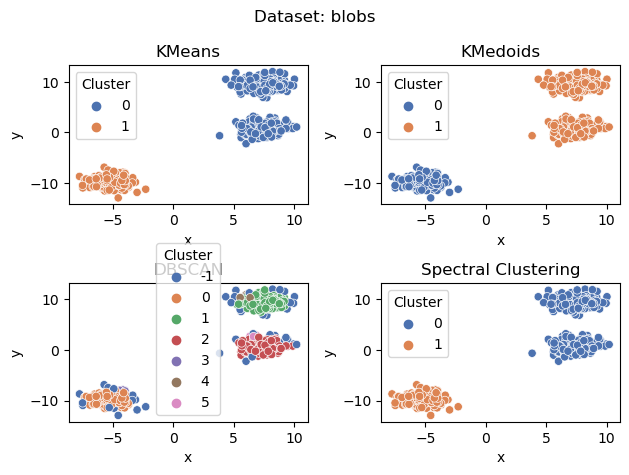

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


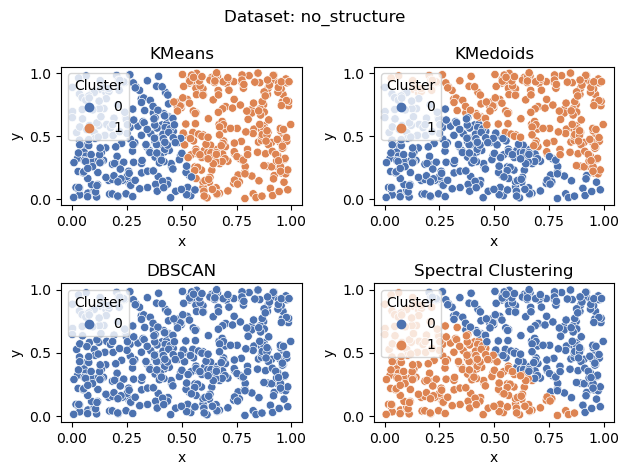

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


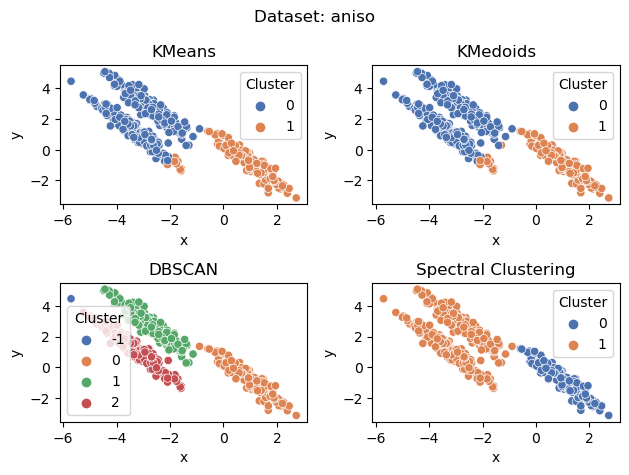

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


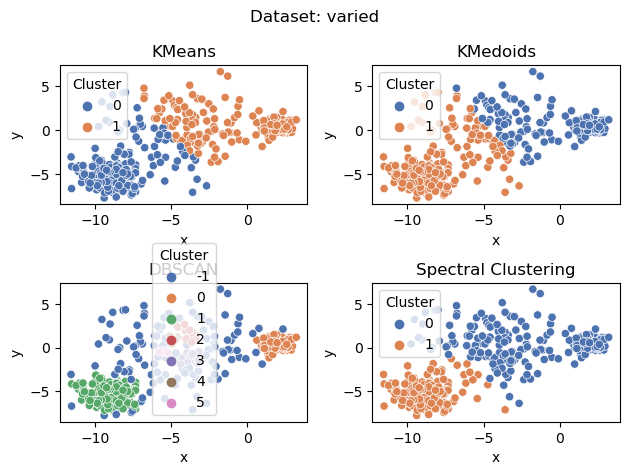

In [44]:
plt.figure(figsize=(6, 6))
for dataset in super_dataset:
    for i,clusterer in enumerate(clusterers.keys()):
        x=pd.DataFrame(dataset[1])
        y=pd.DataFrame(dataset[2])
        df=pd.concat([x,y],axis=1)
        labels=clusterers[clusterer].fit_predict(df)
        labels_df=pd.DataFrame(labels)
        df_labels=pd.concat([df,labels_df],axis=1)
        df_labels.columns=['x','y','Cluster']
        plt.subplot(2, 2, i+1)
        sns.scatterplot(data=df_labels, x='x', y='y', hue='Cluster',palette='deep')
        plt.title(clusterer)
    plt.suptitle('Dataset: '+dataset[0])
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()


    

The results for each algorithm changes a bit, but in most of the cases (at least for a k=2) the deffinition of the 2 clusters are pretty the same, excluding the DBSCAN method.

The DBSCAN Method relies a lot on the setpoint of its hyper-parameter "eps". A bad definition of it can cause a really bad clustering, like the scenarios of the implementation over the circles, moons, and blobs datasets. In the case of the Aniso dataset the clustering developed by DBSCAN is way better than the clustering obtained from the other algorithms, because the general eps=0.5 (by default) defined for the DBSCAN clusterer suits well with this dataset.
